In [1]:
pip install scikit-fuzzy

In [2]:
import numpy as np

# Max-Min Composition given by Zadeh
def maxMin(x, y):
    z = []
    for x1 in x:
        for y1 in y.T:
            z.append(max(np.minimum(x1, y1)))
    return np.array(z).reshape((x.shape[0], y.shape[1]))

# Max-Product Composition given by Rosenfeld
def maxProduct(x, y):
    z = []
    for x1 in x:
        for y1 in y.T:
            z.append(max(np.multiply(x1, y1)))
    return np.array(z).reshape((x.shape[0], y.shape[1]))

# 3 arrays for the example
r1 = np.array([[1, 0, .7], [.3, .2, 0], [0, .5, 1]])
r2 = np.array([[.6, .6, 0], [0, .6, .1], [0, .1, 0]])
r3 = np.array([[1, 0, .7], [0, 1, 0], [.7, 0, 1]])

print ("R1oR2 => Max-Min :\n" + str(maxMin(r1, r2)) + "\n")
print ("R1oR2 => Max-Product :\n" + str(maxProduct(r1, r2)) + "\n\n")

print ("R1oR3 => Max-Min :\n" + str(maxMin(r1, r3)) + "\n")
print ("R1oR3 => Max-Product :\n" + str(maxProduct(r1, r3)) + "\n\n")

print ("R1oR2oR3 => Max-Min :\n" + str(maxMin(r1, maxMin(r2, r3))) + "\n")
print ("R1oR2oR3 => Max-Product :\n" + str(maxProduct(r1, maxProduct(r2, r3))) + "\n\n")

R1oR2 => Max-Min :
[[0.6 0.6 0. ]
 [0.3 0.3 0.1]
 [0.  0.5 0.1]]

R1oR2 => Max-Product :
[[0.6  0.6  0.  ]
 [0.18 0.18 0.02]
 [0.   0.3  0.05]]


R1oR3 => Max-Min :
[[1.  0.  0.7]
 [0.3 0.2 0.3]
 [0.7 0.5 1. ]]

R1oR3 => Max-Product :
[[1.   0.   0.7 ]
 [0.3  0.2  0.21]
 [0.7  0.5  1.  ]]


R1oR2oR3 => Max-Min :
[[0.6 0.6 0.6]
 [0.3 0.3 0.3]
 [0.1 0.5 0.1]]

R1oR2oR3 => Max-Product :
[[0.6   0.6   0.42 ]
 [0.18  0.18  0.126]
 [0.035 0.3   0.05 ]]




In [3]:
import numpy as np

# Min-max Composition given by Zadeh
def minMax(x, y):
    z = []
    for x1 in x:
        for y1 in y.T:
            z.append(min(np.maximum(x1, y1)))
    return np.array(z).reshape((x.shape[0], y.shape[1]))
r1 = np.array([[1, 0, .7], [.3, .2, 0], [0, .5, 1]])
r2 = np.array([[.6, .6, 0], [0, .6, .1], [0, .1, 0]])
print ("R1oR2 => Min-Max :\n" + str(minMax(r1, r2)) + "\n")

R1oR2 => Min-Max :
[[0.  0.6 0.1]
 [0.  0.1 0. ]
 [0.5 0.6 0. ]]



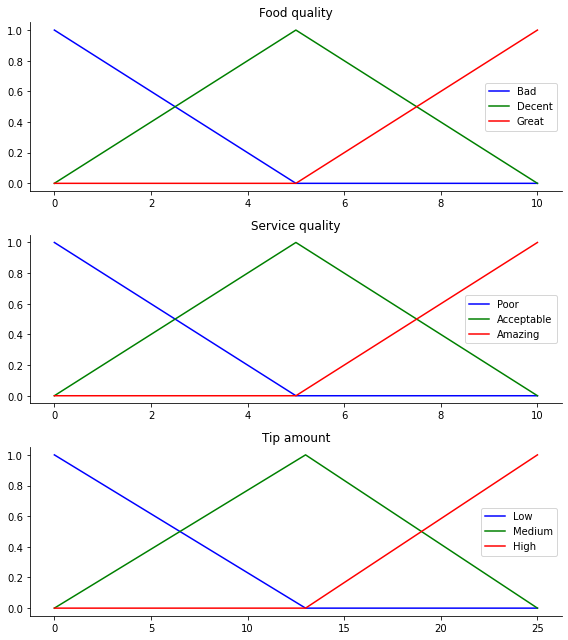

In [4]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Generate universe variables
#   * Quality and service on subjective ranges [0, 10]
#   * Tip has a range of [0, 25] in units of percentage points
x_qual = np.arange(0, 11, 1)
x_serv = np.arange(0, 11, 1)
x_tip  = np.arange(0, 26, 1)

# Generate fuzzy membership functions
qual_lo = fuzz.trimf(x_qual, [0, 0, 5])
qual_md = fuzz.trimf(x_qual, [0, 5, 10])
qual_hi = fuzz.trimf(x_qual, [5, 10, 10])
serv_lo = fuzz.trimf(x_serv, [0, 0, 5])
serv_md = fuzz.trimf(x_serv, [0, 5, 10])
serv_hi = fuzz.trimf(x_serv, [5, 10, 10])
tip_lo = fuzz.trimf(x_tip, [0, 0, 13])
tip_md = fuzz.trimf(x_tip, [0, 13, 25])
tip_hi = fuzz.trimf(x_tip, [13, 25, 25])

# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='Bad')
ax0.plot(x_qual, qual_md, 'g', linewidth=1.5, label='Decent')
ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5, label='Great')
ax0.set_title('Food quality')
ax0.legend()

ax1.plot(x_serv, serv_lo, 'b', linewidth=1.5, label='Poor')
ax1.plot(x_serv, serv_md, 'g', linewidth=1.5, label='Acceptable')
ax1.plot(x_serv, serv_hi, 'r', linewidth=1.5, label='Amazing')
ax1.set_title('Service quality')
ax1.legend()

ax2.plot(x_tip, tip_lo, 'b', linewidth=1.5, label='Low')
ax2.plot(x_tip, tip_md, 'g', linewidth=1.5, label='Medium')
ax2.plot(x_tip, tip_hi, 'r', linewidth=1.5, label='High')
ax2.set_title('Tip amount')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

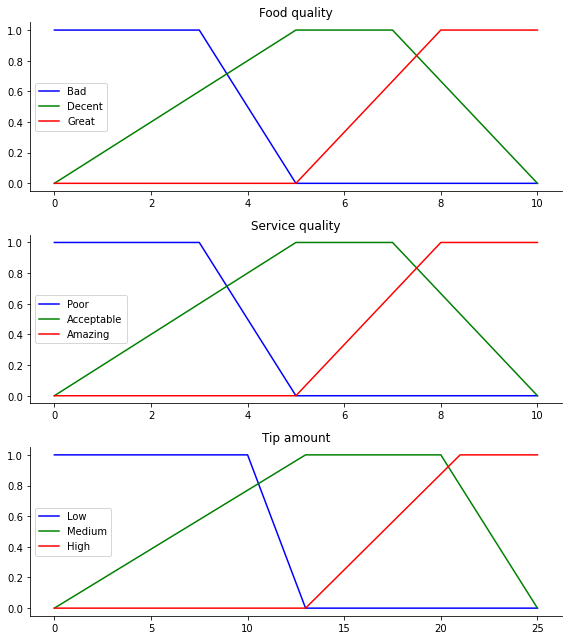

In [9]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Generate universe variables
#   * Quality and service on subjective ranges [0, 10]
#   * Tip has a range of [0, 25] in units of percentage points
x_qual = np.arange(0, 11, 1)
x_serv = np.arange(0, 11, 1)
x_tip  = np.arange(0, 26, 1)

# Generate fuzzy membership functions
qual_lo = fuzz.trapmf(x_qual, [0, 0,3,5])
qual_md = fuzz.trapmf(x_qual, [0, 5,7, 10])
qual_hi = fuzz.trapmf(x_qual, [5,8, 10, 10])
serv_lo = fuzz.trapmf(x_serv, [0, 0,3, 5])
serv_md = fuzz.trapmf(x_serv, [0, 5,7, 10])
serv_hi = fuzz.trapmf(x_serv, [5, 8,10, 10])
tip_lo = fuzz.trapmf(x_tip, [0, 0,10, 13])
tip_md = fuzz.trapmf(x_tip, [0, 13,20, 25])
tip_hi = fuzz.trapmf(x_tip, [13, 21,25, 25])

# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='Bad')
ax0.plot(x_qual, qual_md, 'g', linewidth=1.5, label='Decent')
ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5, label='Great')
ax0.set_title('Food quality')
ax0.legend()

ax1.plot(x_serv, serv_lo, 'b', linewidth=1.5, label='Poor')
ax1.plot(x_serv, serv_md, 'g', linewidth=1.5, label='Acceptable')
ax1.plot(x_serv, serv_hi, 'r', linewidth=1.5, label='Amazing')
ax1.set_title('Service quality')
ax1.legend()

ax2.plot(x_tip, tip_lo, 'b', linewidth=1.5, label='Low')
ax2.plot(x_tip, tip_md, 'g', linewidth=1.5, label='Medium')
ax2.plot(x_tip, tip_hi, 'r', linewidth=1.5, label='High')
ax2.set_title('Tip amount')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

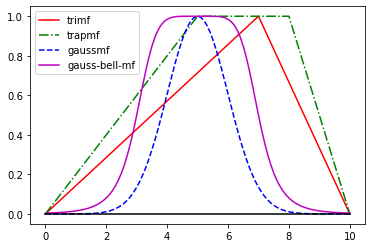

In [10]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
# generate crisp variable
x=np.arange(0,10.1,0.1)
x_axis=np.zeros(x.shape)
#print(x)
# Fuzzyfication= to assign membership function
mfx1=fuzz.trimf(x,[0,7,10]) 
mfx2=fuzz.trapmf(x,[0,5,8,10])
mfx3=fuzz.gaussmf(x,sigma=1,mean=5)
mfx4=fuzz.gbellmf(x,2,3,5)

mfx1.view()
plt.plot(x,mfx1,'r',label='trimf')
plt.plot(x,mfx2,'g-.',label='trapmf')
plt.plot(x,mfx3,'b--',label='gaussmf')
plt.plot(x,mfx4,'m',label='gauss-bell-mf')
plt.plot(x,x_axis,'k')
plt.legend()

8.50877192982456


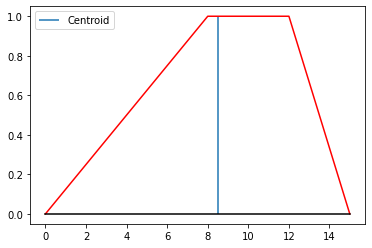

In [13]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
# generate crisp variable
x=np.arange(0,15.1,0.1)
x_axis=np.zeros(x.shape)
#print(x)
# Fuzzyfication= to assign membership function
mfx=fuzz.trapmf(x,[0,8,12,15])
## Defuzzyfication= fuzzy to crips value
defuzz_centroid=fuzz.defuzz(x,mfx,'centroid') 
print(defuzz_centroid)
####
xv=[defuzz_centroid]
ymax=[fuzz.interp_membership(x,mfx,i) for i in xv]
#######
plt.plot(x,mfx,'r')
plt.vlines(defuzz_centroid,0,ymax,label='Centroid')
plt.plot(x,x_axis,'k')
plt.legend()

5.388888888888892
5.499999999999999
6.0
5.0
7.0


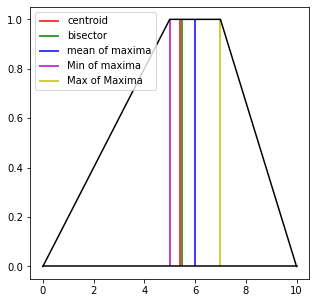

In [15]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
# generate crisp variable
x=np.arange(0,10.1,0.1)
x_axis=np.zeros(x.shape)
#print(x)
# Fuzzyfication= to assign membership function
mfx=fuzz.trapmf(x,[0,5,7,10])
## Defuzzyfication= fuzzy to crips value
defuzz_centroid=fuzz.defuzz(x,mfx,'centroid') 
defuzz_bisector=fuzz.defuzz(x,mfx,'bisector') 
defuzz_mom=fuzz.defuzz(x,mfx,'mom') #mean of maxima
defuzz_som=fuzz.defuzz(x,mfx,'som') # smallets of maxima
defuzz_lom=fuzz.defuzz(x,mfx,'lom') # largets of maxima 
####
print(defuzz_centroid)
print(defuzz_bisector)
print(defuzz_mom)
print(defuzz_som)
print(defuzz_lom)

xv=[defuzz_centroid,defuzz_bisector,defuzz_mom,defuzz_som,defuzz_lom]
ymax=[fuzz.interp_membership(x,mfx,i) for i in xv]
labels=['centroid','bisector','mean of maxima','Min of maxima',
        'Max of Maxima']
color=['r','g','b','m','y']
#######
plt.figure(figsize=(5,5))
plt.plot(x,mfx,'k')
for i,j,k,l in zip(xv,ymax,labels,color):
    plt.vlines(i,0,j,label=k,color=l)
plt.plot(x,x_axis,'k')
plt.legend(loc=2)

In [7]:
"""Fuzzy Inference System
break power system Design a fuzzy inference system having two inputs are speed of car [0-180km/hr] & distance of obstacle[0-500m] to apply automatically break-power [0-100%]. Compute the break-power at speed =120km/hr and distance=50m."""
# library 
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt 

In [8]:
#Input [Antecedent] and output [Consequent] variable P->Q
speed=ctrl.Antecedent(np.arange(0,181,1),'speed')
dist=ctrl.Antecedent(np.arange(0,501,1),'dist')
bp=ctrl.Consequent(np.arange(0,101,1),'bp')

C:\Users\Lipu\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


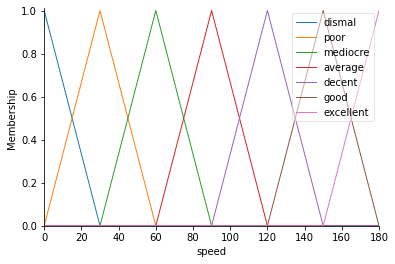

In [9]:
# fuzzyfication [automf]
# automf-generate fuzzymembership automatically
speed.automf(3) # 3 membership variable
speed.automf(5) # 5 membership variable
speed.automf(7) # 7 membership variable
speed.view()

C:\Users\Lipu\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Lipu\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Lipu\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Lipu\anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


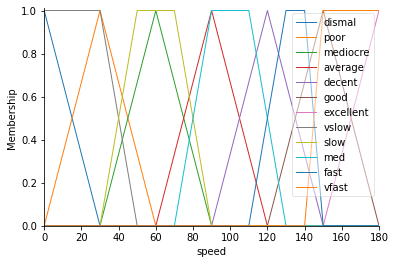

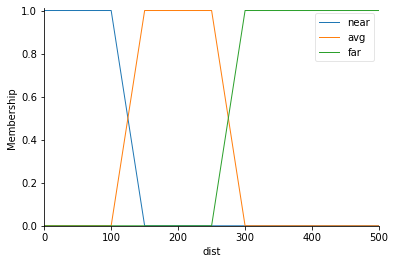

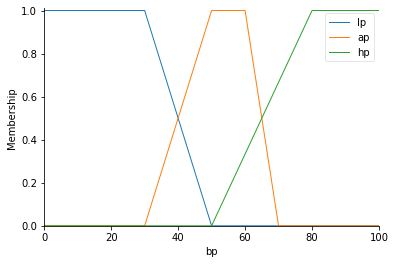

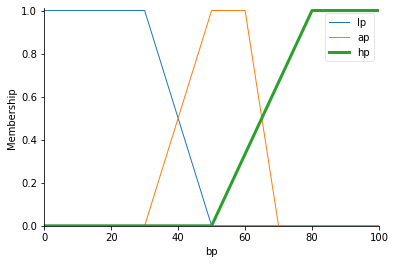

In [10]:
# user defined membership function
speed['vslow']=fuzz.trapmf(speed.universe,[0,0,30,50])
speed['slow']=fuzz.trapmf(speed.universe,[30,50,70,90])
speed['med']=fuzz.trapmf(speed.universe,[70,90,110,130])
speed['fast']=fuzz.trapmf(speed.universe,[110,130,140,150])
speed['vfast']=fuzz.trapmf(speed.universe,[140,150,180,180])
speed.view()
dist['near']=fuzz.trapmf(dist.universe,[0,0,100,150])
dist['avg']=fuzz.trapmf(dist.universe,[100,150,250,300])
dist['far']=fuzz.trapmf(dist.universe,[250,300,500,500])
dist.view()
bp['lp']=fuzz.trapmf(bp.universe,[0,0,30,50])
bp['ap']=fuzz.trapmf(bp.universe,[30,50,60,70])
bp['hp']=fuzz.trapmf(bp.universe,[50,80,100,100])
bp.view()
bp['hp'].view() # plot only hp of bp

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

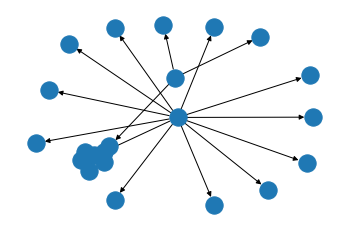

In [11]:
# Design set rules [Knowledge base]
rule1=ctrl.Rule(speed['vslow'] & dist['far'], bp['lp'])
rule2=ctrl.Rule(speed['vfast'] | dist['near'], bp['hp'])
rule3=ctrl.Rule(speed['fast'] | dist['near'], bp['hp'])
rule4=ctrl.Rule(speed['vslow'] | dist['far'], bp['lp'])
rule5=ctrl.Rule(speed['med'] | dist['avg'], bp['ap'])
rule1.view()

In [12]:
# FIS system
bp_controller=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
bpsc=ctrl.ControlSystemSimulation(bp_controller)

In [13]:
#Compute the break-power at speed =120km/hr and distance=50m.
bpsc.input['speed']=120
bpsc.input['dist']=50
bpsc.compute()
print(bpsc.output['bp'])

72.92792792792793


C:\Users\Lipu\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


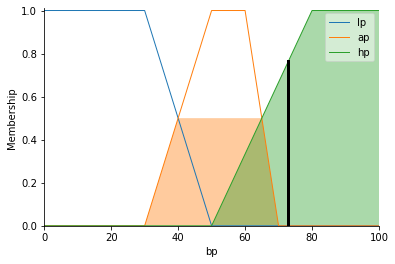

In [14]:
# plot output
bp.view(sim=bpsc)